<div style="display: flex; background-color: #3F579F;">
    <h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px;" align="center">Consumption needs of buildings - Project 4</h1>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 5px 30px 0px 30px;" >
    <h2 style="width: 100%; text-align: center; float: left;" align="center">| Modeling notebook |</h2>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 10px 30px 30px 30px;">
    <h3 style="width: 100%; text-align: center; font-size:26px; float: left;" align="center">Data Scientist course - OpenClassrooms</h3>
</div>

<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1. Libraries and functions</h3>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">1.1. Libraries and functions</h3>
</div>

In [1]:
## df_analysis
import io
import gc
import timeit
import math
from math import prod

## General
import pandas as pd
import numpy as np
from numpy.random import seed, randint
import matplotlib.pyplot as plt
import seaborn as sns

## Scikit Learn library
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_validate, KFold, GridSearchCV, validation_curve, learning_curve, cross_val_predict, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


%matplotlib inline

sns.set_theme(style="darkgrid")

SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">1.2. Functions declaration</h4>
</div>

In [2]:
def df_analysis(df, name_df, *args, **kwargs):
    """
    Method used to analyze on the DataFrame.

    Parameters:
    -----------------
        df : pandas.DataFrame
        Dataset to analyze.
        
        name_df : str
        Dataset name.
        
        *args, **kwargs:
        -----------------
            columns : list
            Dataframe keys in list format.
            
            flag : str
            Flag to show complete information about the dataset to analyse
            "complete" shows all information about the dataset.

    Returns:
    -----------------
        None. 
        Print the analysis on the Dataset. 
        
    """
    
    # Getting the variables
    columns = kwargs.get("columns", None)
    type_analysis = kwargs.get("type_analysis", None)
    
    ORDERING_COMPLETE = [
        "name", "type", "records", "unique", "# NaN", "% NaN", "mean", "min", "25%", "50%", "75%", "max", "std"
    ]
    
    # Calculating the memory usage based on dataframe.info()
    buf = io.StringIO()
    df.info(buf=buf)
    memory_usage = buf.getvalue().split('\n')[-2]
    
    if df.empty:
        print("The", name_df, "dataset is empty. Please verify the file.")
    else:
        empty_cols = [col for col in df.columns if df[col].isna().all()] # identifying empty columns
        df_rows_duplicates = df[df.duplicated()] #identifying full duplicates rows
        
        # Creating a dataset based on Type object and records by columns
        type_cols = df.dtypes.apply(lambda x: x.name).to_dict() 
        df_resume = pd.DataFrame(list(type_cols.items()), columns = ["name", "type"])
        df_resume["records"] = list(df.count())
        df_resume["# NaN"] = list(df.isnull().sum())
        df_resume["% NaN"] = list(((df.isnull().sum() / len(df.index))*100).round(2))
        
        print("\nAnalysis of", name_df, "dataset")
        print("--------------------------------------------------------------------")
        print("- Dataset shape:                 ", df.shape[0], "rows and", df.shape[1], "columns")
        print("- Total of NaN values:           ", df.isna().sum().sum())
        print("- Percentage of NaN:             ", round((df.isna().sum().sum() / prod(df.shape)) * 100, 2), "%")
        print("- Total of full duplicates rows: ", df_rows_duplicates.shape[0])
        print("- Total of empty rows:           ", df.shape[0] - df.dropna(axis="rows", how="all").shape[0]) if df.dropna(axis="rows", how="all").shape[0] < df.shape[0] else \
                    print("- Total of empty rows:            0")
        print("- Total of empty columns:        ", len(empty_cols))
        print("  + The empty column is:         ", empty_cols) if len(empty_cols) == 1 else \
                    print("  + The empty column are:         ", empty_cols) if len(empty_cols) >= 1 else None
        print("- Unique indexes:                ", df.index.is_unique)
        
        if columns is not None:
            print("\n- The key(s):", columns, "is not present multiple times in the dataframe.\n  It CAN be used as a primary key.") if df.size == df.drop_duplicates(columns).size else \
                print("\n- The key(s):", columns, "is present multiple times in the dataframe.\n  It CANNOT be used as a primary key.")
        
        if type_analysis == "summarized":
            print("\n")
        
        if type_analysis is None or type_analysis != "summarized":
            pd.set_option("display.max_rows", None) # show full of showing rows
            pd.set_option("display.max_columns", None) # show full of showing cols
            pd.set_option("display.max_colwidth", None) # show full width of showing cols
            pd.set_option("display.float_format", lambda x: "%.5f" % x) # show full content in cell    
            
            if type_analysis is None or type_analysis != "complete":
                print("\n- Type object and records by columns      (",memory_usage,")")
                print("--------------------------------------------------------------------")
            elif type_analysis == "complete":
                df_resume["unique"] = list(df.nunique())
                df_desc = pd.DataFrame(df.describe().T).reset_index()
                df_desc = df_desc.rename(columns={"index": "name"})
                df_resume = df_resume.merge(right=df_desc[["name", "mean", "min", "25%", "50%", "75%", "max", "std"]], on="name", how="left")
                df_resume = df_resume[ORDERING_COMPLETE]
                print("\n- Type object and records by columns      (",memory_usage,")")
                print("--------------------------------------------------------------------")
                
            display(df_resume.sort_values("records", ascending=False))
            
            pd.reset_option("display.max_rows") # reset max of showing rows
            pd.reset_option("display.max_columns") # reset max of showing cols
            pd.reset_option("display.max_colwidth") # reset width of showing cols
            pd.reset_option("display.float_format") # reset show full content in cell
            
        # deleting dataframe to free memory
        if type_analysis == "complete":
            del [[df_resume, df_desc]]
            gc.collect()
            df_resume, df_desc = (pd.DataFrame() for i in range(2))
        else:
            del df_resume
            gc.collect()
            df_resume = pd.DataFrame()
            
            
def plot_learning_curve(estimator, name_model, X_train, y_train, cv=None, train_sizes=np.linspace(0.2, 1.0, 10)):
    """
    Generate 3 plots: 
        1. The test and training learning curve
        2. The training samples vs fit times curve
        3. The fit times vs score curve
    
    Parameters
    -----------------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.
        
    name_model : str
        Name of the model as title for the chart.        
        
    X_train : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y_train : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.        
        
    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5) or (0.2, 1.0, 10))
        
    Returns:
    -----------------
        None. 
        Plot the graphs. 
        
    """
    
    # Get the learning_curves results
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X_train, y_train, cv=cv, \
                                                                           train_sizes=train_sizes, n_jobs=-1, return_times=True)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    # Initializing figure
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8, 18))

    # Plot learning curve
    plot = sns.lineplot(x=train_sizes, y=train_scores_mean, label="Train", marker="o", ax=ax1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")

    plot = sns.lineplot(x=train_sizes, y=test_scores_mean, label="Validation", marker="o", ax=ax1)
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
    
    ax1.legend(loc="best")
    ax1.set_title(" Learning curve (" + name_model + ")", fontdict={ "fontsize": 16, "fontweight": "normal" })
    plot.set(xlabel="Training examples", ylabel="R2-score".translate(SUP))
    
    # Plot Scalability of the model
    plot = sns.lineplot(x=train_sizes, y=fit_times_mean, marker="o", ax=ax2)
    ax2.fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.1, color="blue")
    
    ax2.set_title("Scalability of the model", fontdict={ "fontsize": 16, "fontweight": "normal" })
    plot.set(xlabel="Training examples", ylabel="Fit times")

    # Performance of the model
    plot = sns.lineplot(x=fit_times_mean, y=test_scores_mean, marker="o", ax=ax3)
    ax3.fill_between(fit_times_mean, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)
    
    ax3.set_title("Performance of the model", fontdict={ "fontsize": 16, "fontweight": "normal" })
    plot.set(xlabel="Fit times examples", ylabel="R2-score".translate(SUP))
    
    plt.savefig("img/" + name_model + "-performance-model.png")
    sns.despine(fig)
    plt.show()
    
    
def plot_validation_curve(estimator, name_model, X_train, y_train, param_name, param_range, param_name_short, cv=None):
    """
    Generate 1 plots: 
        1. The test and training validation curve
    
    Parameters
    -----------------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.
        
    name_model : str
        Name of the model as title for the chart.     
        
    X_train : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y_train : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.      
        
    param_name : str
        Name of the parameter that will be varied.
    
    param_range : array-like of shape (n_values,)
        The values of the parameter that will be evaluated.
    
    param_name_short : str
        Short name for param_name
        
    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
        
    Returns:
    -----------------
        None. 
        Plot the graph. 
        
    """    
    
    # Get the validation_curves results
    train_scores, test_scores = validation_curve(estimator, X_train, y_train, param_name=param_name, param_range=param_range, cv=kfold)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Initializing figure
    fig = plt.figure(figsize=(8, 6))

    plot = sns.lineplot(x=n_neighbors, y=train_scores_mean, label="Train", marker="o")
    plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")

    plot = sns.lineplot(x=n_neighbors, y=test_scores_mean, label="Validation", marker="o")
    plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")

    plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
    plt.title(name_model + " Validation curve", fontdict={ "fontsize": 16, "fontweight": "normal" })
    plot.set(xlabel=param_name_short, ylabel="R2-score".translate(SUP), xlim=[0, 51])
    
    plt.savefig("img/" + name_model + "-validation-curve.png")
    sns.despine(fig)
    plt.show()


def plot_cross_val_predi(estimator, name_model, X_train, y_train, cv=None):
    """
    Generate 1 plots: 
        1. The validation between real values vs predicted values
    
    Parameters
    -----------------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.
        
    name_model : str
        Name of the model as title for the chart.     
        
    X_train : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y_train : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.      
        
    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
        
    Returns:
    -----------------
        None. 
        Plot the graph. 
        
    """   
    
    # Get the predicted values
    predicted = cross_val_predict(estimator, X_train, y_train, cv=kfold)
    
    # Initializing figure
    fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.scatter(y_train, predicted, edgecolors=(0, 0, 0))
    ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "--k", lw=4)
    
    ax.text(min(y_train)+0.2, 0.98*max(y_train), r'$R^2$=%.2f, RMSE=%.2f' % (
            round(r2_score(y_train, predicted), 3),
            round(math.sqrt(mean_squared_error(y_train, predicted)), 3)), 
            style="italic", fontsize=12,
            bbox={"facecolor": "grey", "alpha": 0.4, "pad": 5})
            
    ax.set_title(name_model + " Cross-Values Predictions", fontdict={ "fontsize": 16, "fontweight": "normal" })
    ax.set_xlabel("Real values")
    ax.set_ylabel("Predicted values")
    plt.savefig("img/" + name_model + "-cross-val-predict.png")
    plt.show()
    

def plot_features_importance(estimator, name_model, X_train, y_train, scoring=None):
    """
    Generate 1 plots: 
        1. The importance by feature
    
    Parameters
    -----------------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.
        
    name_model : str
        Name of the model as title for the chart.     
        
    X_train : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y_train : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning. 
        
    scoring : string, callable or None, default=None
        Scorer to use. It can be a single string or a callable. 
        If None, the estimator’s default scorer is used. 
        
    Returns:
    -----------------
        None. 
        Plot the graph. 
        
    """     
    # Get the importance by feature
    results = permutation_importance(reg, X_train, y_train, scoring="neg_mean_squared_error")
    
    # Making a dataframe to work easily
    df_importance = pd.DataFrame({
                        "Feature" : X_train.columns,
                        "Importance" : results.importances_mean
                    })
    
    # Sorting by importance before plotting
    df_importance = df_importance.sort_values("Importance")
    
    # Initializing figure    
    fig = plt.subplots(figsize=(10, 8))
    
    plot = sns.barplot(data=df_importance, y=df_importance["Feature"], x=df_importance["Importance"])
    
    plt.title("KNeighbors Features Importance", fontdict={ "fontsize": 16, "fontweight": "normal" })
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.savefig("img/" + name_model + "-feature-importance.png")
    plt.show()

<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2. Importing files</h3>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">2.1. Importing and preparing files</h4>
</div>

In [3]:
data = pd.read_csv(r"datasets\df_cleaned_final.csv")

In [4]:
data.head()

,NumberofFloors,NumberofBuildings,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),Neighborhood,renamed_PropertyType,Electricity_ratio,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e)
0,12,1,94,88434,0,88434,DOWNTOWN,Hotel,52.79951,6981428.0,249.43
1,11,1,25,103566,15064,88502,DOWNTOWN,Hotel,46.74768,8354235.0,263.51
2,41,1,52,956110,196718,759392,DOWNTOWN,Hotel,68.04593,73130656.0,2061.48
3,10,1,95,61320,0,61320,DOWNTOWN,Hotel,9.80903,28229320.0,1936.34
4,18,1,41,175580,62000,113580,DOWNTOWN,Hotel,40.90771,14829099.0,507.70


In [5]:
df_analysis(data, "data", type_analysis="complete")


Analysis of data dataset
--------------------------------------------------------------------
- Dataset shape:                  1656 rows and 11 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 142.4+ KB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,NumberofFloors,int64,1656,42,0,0.00000,4.13285,1.00000,1.00000,2.00000,4.00000,99.00000,6.53546
1,NumberofBuildings,int64,1656,11,0,0.00000,1.13164,1.00000,1.00000,1.00000,1.00000,111.00000,2.91856
2,BuildingAge,int64,1656,113,0,0.00000,59.22645,6.00000,32.00000,56.00000,91.00000,121.00000,32.65619
3,PropertyGFATotal,int64,1656,1577,0,0.00000,119192.86171,11285.00000,29398.50000,49289.50000,105070.75000,9320156.00000,298038.52446
4,PropertyGFAParking,int64,1656,326,0,0.00000,13321.64251,0.00000,0.00000,0.00000,0.00000,512608.00000,43664.74773
5,PropertyGFABuilding(s),int64,1656,1572,0,0.00000,105871.21920,3636.00000,28356.00000,47484.50000,94479.00000,9320156.00000,284529.39591
6,Neighborhood,object,1656,13,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,renamed_PropertyType,object,1656,8,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Electricity_ratio,float64,1656,1297,0,0.00000,70.74668,0.00033,50.47055,72.26544,99.99938,100.00874,25.82563
9,SiteEnergyUse(kBtu),float64,1656,1655,0,0.00000,8563131.38206,11441.00000,1222923.50000,2512737.00000,7009066.00000,873923712.00000,30439268.96365


<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3. Splitting data (SiteEnergyUse(kBtu)</h3>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.1. Splitting dataset based on the features and targets</h4>
</div>

In [6]:
data.head()

,NumberofFloors,NumberofBuildings,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),Neighborhood,renamed_PropertyType,Electricity_ratio,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e)
0,12,1,94,88434,0,88434,DOWNTOWN,Hotel,52.79951,6981428.0,249.43
1,11,1,25,103566,15064,88502,DOWNTOWN,Hotel,46.74768,8354235.0,263.51
2,41,1,52,956110,196718,759392,DOWNTOWN,Hotel,68.04593,73130656.0,2061.48
3,10,1,95,61320,0,61320,DOWNTOWN,Hotel,9.80903,28229320.0,1936.34
4,18,1,41,175580,62000,113580,DOWNTOWN,Hotel,40.90771,14829099.0,507.70


<div class="alert alert-block alert-info">
    Working with a copy
</div>

In [7]:
data_trans = data.copy()

In [8]:
data_trans.head()

,NumberofFloors,NumberofBuildings,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),Neighborhood,renamed_PropertyType,Electricity_ratio,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e)
0,12,1,94,88434,0,88434,DOWNTOWN,Hotel,52.79951,6981428.0,249.43
1,11,1,25,103566,15064,88502,DOWNTOWN,Hotel,46.74768,8354235.0,263.51
2,41,1,52,956110,196718,759392,DOWNTOWN,Hotel,68.04593,73130656.0,2061.48
3,10,1,95,61320,0,61320,DOWNTOWN,Hotel,9.80903,28229320.0,1936.34
4,18,1,41,175580,62000,113580,DOWNTOWN,Hotel,40.90771,14829099.0,507.70


<div class="alert alert-block alert-info">
    Making log transformation on specific columns based on the analysis conclusions done
</div>

In [9]:
LOG_TRANS_FEATURES = ["PropertyGFABuilding(s)", "PropertyGFATotal", "SiteEnergyUse(kBtu)", "GHGEmissions(MetricTonsCO2e)"]

In [10]:
for col in LOG_TRANS_FEATURES:
    data_trans[col] = np.log2(data_trans[col])

In [11]:
data_trans.head()

,NumberofFloors,NumberofBuildings,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),Neighborhood,renamed_PropertyType,Electricity_ratio,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e)
0,12,1,94,16.432314,0,16.432314,DOWNTOWN,Hotel,52.79951,22.735091,7.962491
1,11,1,25,16.660191,15064,16.433422,DOWNTOWN,Hotel,46.74768,22.994076,8.041714
2,41,1,52,19.866817,196718,19.534485,DOWNTOWN,Hotel,68.04593,26.123973,11.009465
3,10,1,95,15.904070,0,15.904070,DOWNTOWN,Hotel,9.80903,24.750691,10.919117
4,18,1,41,17.421769,62000,16.793349,DOWNTOWN,Hotel,40.90771,23.821928,8.987832


<div class="alert alert-block alert-info">
    Splitting dataset based on the features and targets
</div>

In [12]:
X = data_trans.drop(columns=["SiteEnergyUse(kBtu)", "GHGEmissions(MetricTonsCO2e)"])

In [13]:
y_energy = data_trans.iloc[:,-2]

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.2. Train/Test split</h4>
</div>

<div class="alert alert-block alert-info">
    At this point, we are going to predict <b>SiteEnergyUse(kBtu)</b>
</div>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y_energy, test_size=0.3, random_state=0)

In [15]:
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))

X_train: (1159, 9)
y_train: (1159,)


In [16]:
X_train.head()

,NumberofFloors,NumberofBuildings,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),Neighborhood,renamed_PropertyType,Electricity_ratio
593,2,1,55,16.908299,0,16.908299,GREATER DUWAMISH,Warehouse,100.00416
930,1,1,46,14.779617,0,14.779617,GREATER DUWAMISH,Warehouse,68.93000
838,3,1,103,15.219320,0,15.219320,DOWNTOWN,Office,100.00415
649,3,1,79,15.979916,0,15.979916,DOWNTOWN,Office,56.61121
529,5,1,23,16.754000,0,16.754000,MAGNOLIA / QUEEN ANNE,Office,100.00414


<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.3. Identifying types of features</h4>
</div>

In [17]:
NUMERICAL_FEATURES = ["NumberofFloors", "NumberofBuildings", "BuildingAge", "PropertyGFATotal", "PropertyGFAParking", "PropertyGFABuilding(s)", "Electricity_ratio"]
CATEGORICAL_FEATURES = ["Neighborhood", "renamed_PropertyType"]

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">4. Data preprocessing</h3>
</div>

<div class="alert alert-block alert-info">
     We are going to process the features as follows<br><br>
    <b>Numerical features</b>
    <ul style="list-style-type: square;">
        <li>Normalizing the features through StandardScaler due to all of them do not have a normal distribution</li>
    </ul> 
    <b>Categorical features</b>
    <ul style="list-style-type: square;">
        <li>Transforming all features through LabelEncoder</li>
    </ul>  
</div>

In [18]:
numerical_pipeline = make_pipeline(StandardScaler())

categorical_pipeline = make_pipeline(OneHotEncoder())

In [19]:
preprocessor = make_column_transformer(
                (numerical_pipeline, NUMERICAL_FEATURES), 
                (categorical_pipeline, CATEGORICAL_FEATURES))

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5. Modelisation</h3>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.1. Supervised models</h4>
</div>

<div class="alert alert-block alert-info">
    List of models to use. for now, in default mode
</div>

In [20]:
regressors = {
    "KNeighbors" : KNeighborsRegressor(n_neighbors=2),
    "Linear" : LinearRegression(),
    "Lasso" : Lasso(),
    "Random Forest" : RandomForestRegressor(),
    "SVR" : SVR(),
    "Gradient Boosting" : GradientBoostingRegressor()
}

<div class="alert alert-block alert-info">
    Models metrics
</div>

In [21]:
# Dataframe with y_test_transformed to compared againts predictions
df_y_pred = pd.DataFrame({
        "Model" : "Original",
        "y_pred" : y_test
})

# List of metrics results for each models 
LIST_MODEL, LIST_R2SCORE, LIST_MAE, LIST_RMSE, LIST_DURATION  = ([] for i in range(5))

for k, v in regressors.items():
    
    start_time_model = timeit.default_timer()
    
    # Data preprocessing based on the pipelines and the regressors setup
    reg = make_pipeline(preprocessor, v)
    
    # Fit the model using the training data and training target
    reg.fit(X_train, y_train)
    
    # Making the prediction using the testing data
    y_pred = reg.predict(X_test)
    
    end_time_model =  round(timeit.default_timer() - start_time_model, 3)
    
    # Concatenating predictions to compare against y_test_transformed
    df_temp = pd.DataFrame({
        "Model" : k,
        "y_pred" : y_pred
    })
    
    # Concatenating predictions to compare against y_test_transformed
    df_y_pred = pd.concat([df_y_pred, df_temp])
    
    # Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
    R2SCORE = round(r2_score(y_test, y_pred), 3)
    
    # Calculating the Mean absolute error (The best value is 0.0)
    MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
    # Calculating Root Mean Square Error for each model (The best value is 0.0)
    RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)
    
    # Adding results into LIST
    LIST_MODEL.append(k)
    LIST_MAE.append(MAE)
    LIST_RMSE.append(RMSE)
    LIST_R2SCORE.append(R2SCORE)
    LIST_DURATION.append(end_time_model)

<div class="alert alert-block alert-info">
    Comparison of energy predictions against original data
</div>

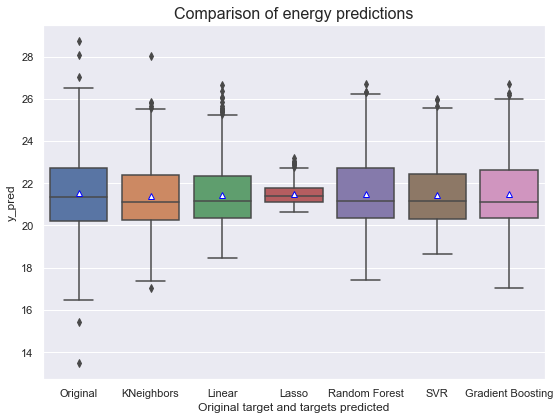

In [22]:
plt.figure(figsize=[8,6])
sns.boxplot(x=df_y_pred["Model"], y=df_y_pred["y_pred"], showmeans=True, 
            meanprops={"markerfacecolor":"white", "markeredgecolor":"blue"})
plt.title("Comparison of energy predictions", size=16)
plt.xlabel("Original target and targets predicted", size=12)
plt.tight_layout()
plt.savefig("img/Comparison-of-imputations.png")
plt.show()

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.2. Predictions metrics</h4>
</div>

<div class="alert alert-block alert-info">
    Creating dataframe based on metrics results for each models
</div>

In [23]:
df_models_metrics = pd.DataFrame({
    "Model" : LIST_MODEL,
    "R2".translate(SUP) : LIST_R2SCORE, 
    "MAE" : LIST_MAE,    
    "RMSE" : LIST_RMSE,
    "Duration" : LIST_DURATION,
})

df_models_metrics

,Model,R²,MAE,RMSE,Duration
0,KNeighbors,0.526,0.953,1.334,0.109
1,Linear,0.683,0.795,1.091,0.074
2,Lasso,0.312,1.232,1.606,0.027
3,Random Forest,0.707,0.789,1.049,1.443
4,SVR,0.679,0.778,1.097,0.241
5,Gradient Boosting,0.733,0.760,1.001,0.417


<div class="alert alert-block alert-success">
    <b>Best results</b> with default mode considering each model
    <ul style="list-style-type: square;">
        <li><b>r2:</b> Gradient Boosting(0.732) </li>
        <li><b>MAE:</b> Gradient Boosting(0.759) </li>
        <li><b>RMSE:</b> Gradient Boosting(1.003) </li>
        <li><b>Duration:</b> Lasso(0.018) </li>
    </ul> 
</div>

In [24]:
df_models_metrics_melt = pd.melt(df_models_metrics, id_vars="Model", var_name="Metric", value_name="Value")
df_models_metrics_melt.head()

,Model,Metric,Value
0,KNeighbors,R²,0.526
1,Linear,R²,0.683
2,Lasso,R²,0.312
3,Random Forest,R²,0.707
4,SVR,R²,0.679


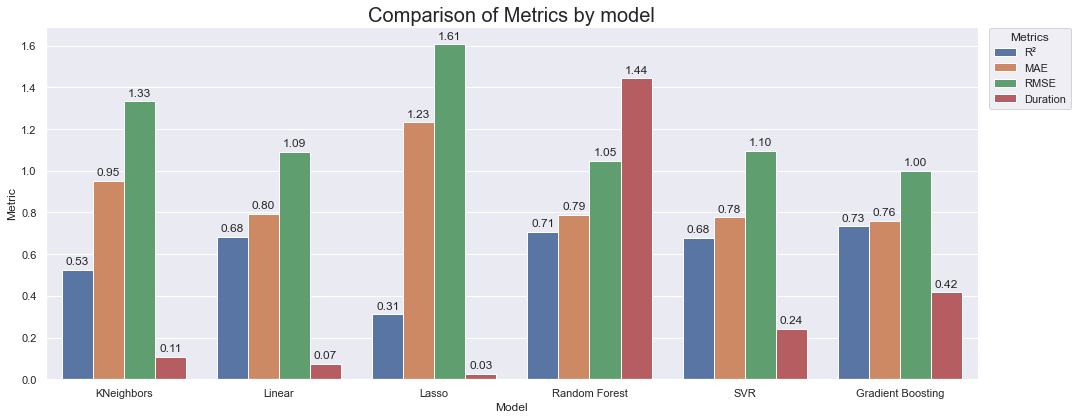

In [25]:
fig, ax1 = plt.subplots(figsize=(15, 6))
plot = sns.barplot(x="Model", y="Value", hue="Metric", data=df_models_metrics_melt, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".2f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Comparison of Metrics by model", size=20)
plt.legend(bbox_to_anchor=(1.10, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Model", size=12)
plt.ylabel("Metric", size=12)
plt.savefig("img/comparisonMetricsByModel.png")
sns.despine(fig)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.3. Cross Validation K-Fold</h4>
</div>

In [26]:
# List of metrics results for each models 
LIST_MODEL, LIST_R2SCORE, LIST_MAE, LIST_RMSE, LIST_DURATION, LIST_SCORES  = ([] for i in range(6))

for k, v in regressors.items():

    # Data preprocessing based on the pipelines and the regressors setup
    reg = make_pipeline(preprocessor, v)
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    
    # Get the score for each validation score method to get accuracy of model
    scores = cross_validate(reg, X_train, y_train, cv=kfold, scoring=("r2", "neg_mean_absolute_error", "neg_mean_squared_error"), return_train_score=True)
    
    # Adding results into LIST
    LIST_MODEL.append(k)
    LIST_R2SCORE.append(round(scores.get("test_r2").mean(), 3))
    LIST_MAE.append(round(abs(scores.get("test_neg_mean_absolute_error").mean()), 3))
    LIST_RMSE.append(round(math.sqrt((abs(scores.get("test_neg_mean_squared_error").mean()))), 3))
    LIST_DURATION.append(round(scores.get("fit_time").mean(), 3))
    LIST_SCORES.append(scores.get("test_r2"))

<div class="alert alert-block alert-info">
    Plotting the cross validation executions
</div>

In [27]:
df_cross_val = pd.DataFrame(LIST_SCORES, columns=[1, 2, 3, 4, 5])
df_cross_val["Model"] = LIST_MODEL
df_cross_val_melt = df_cross_val.melt(id_vars="Model", var_name="Execution", value_name="Score")

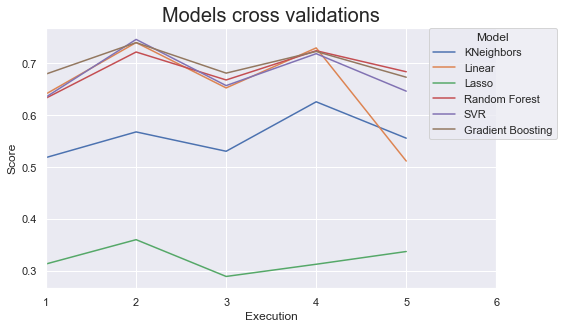

In [28]:
plt.figure(figsize=(8, 6))
plot = sns.lineplot(x="Execution",
                    y="Score",
                    hue="Model",
                    data=df_cross_val_melt
)
plt.legend(bbox_to_anchor=(0.85, 1), borderaxespad=0, title="Model")
plt.tight_layout()
plt.title("Models cross validations", size=20)
plot.set(xlabel="Execution", ylabel="Score", xlim=(1, 6))

plt.savefig("img/models-cross-validations-Scores.png")
sns.despine(fig)

<div style="background-color: #6D83C5;" >
    <h5 style="margin: auto; padding: 20px; color:#fff; ">5.3.1 Predictions metrics</h5>
</div>

<div class="alert alert-block alert-info">
    Creating dataframe based on metrics results for each models
</div>

In [29]:
df_models_metrics_cross = pd.DataFrame({
    "Model" : LIST_MODEL,
    "R2".translate(SUP) : LIST_R2SCORE, 
    "MAE" : LIST_MAE,    
    "RMSE" : LIST_RMSE,
    "Duration" : LIST_DURATION,
})

df_models_metrics_cross

,Model,R²,MAE,RMSE,Duration
0,KNeighbors,0.560,0.958,1.278,0.045
1,Linear,0.655,0.811,1.129,0.025
2,Lasso,0.322,1.237,1.587,0.025
3,Random Forest,0.686,0.797,1.080,1.200
4,SVR,0.681,0.788,1.089,0.132
5,Gradient Boosting,0.700,0.777,1.056,0.290


<div class="alert alert-block alert-info">
    <b>Best results</b> with default mode considering each model
    <ul style="list-style-type: square;">
        <li><b>r2:</b> Gradient Boosting(0.701) </li>
        <li><b>MAE:</b> Gradient Boosting(0.777) </li>
        <li><b>RMSE:</b> Gradient Boosting(1.054) </li>
        <li><b>Duration:</b> Lasso(0.008) </li>
    </ul> 
</div>

In [30]:
df_models_metrics_melt_cross = pd.melt(df_models_metrics_cross, id_vars="Model", var_name="Metric", value_name="Value")
df_models_metrics_melt_cross.head()

,Model,Metric,Value
0,KNeighbors,R²,0.560
1,Linear,R²,0.655
2,Lasso,R²,0.322
3,Random Forest,R²,0.686
4,SVR,R²,0.681


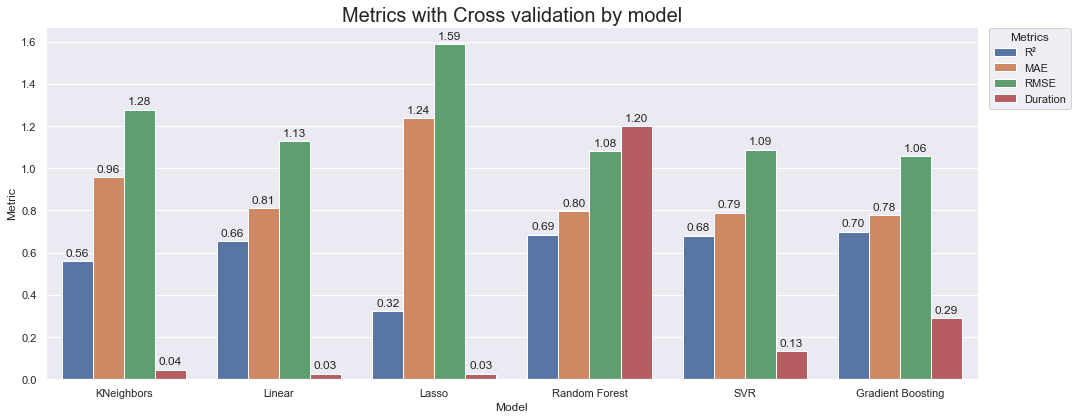

In [31]:
fig, ax1 = plt.subplots(figsize=(15, 6))
plot = sns.barplot(x="Model", y="Value", hue="Metric", data=df_models_metrics_melt_cross, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".2f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Metrics with Cross validation by model", size=20)
plt.legend(bbox_to_anchor=(1.10, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Model", size=12)
plt.ylabel("Metric", size=12)
plt.savefig("img/comparisonMetrics_crossByModel.png")
sns.despine(fig)

<div class="alert alert-block alert-info">
    <b>In conclusion</b> the results are very similar to previous results
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6. Optimization</h3>
</div>

<div class="alert alert-block alert-info">
    We are going to optimize each model separately, to see the results more in detail.<br><br>
    
    At the same time, we are going to get the following metrics
</div>

In [32]:
SCORINGS = {
    "R2" : "r2",
    "MSE" : "neg_mean_squared_error", 
    "MAE" : "neg_mean_absolute_error"
}

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.1. KNeighbors optimization</h4>
</div>

<div class="alert alert-block alert-info">
    Initializing model
</div>

In [33]:
knn = KNeighborsRegressor()

<div class="alert alert-block alert-info">
    Data preprocessing based on the pipelines and the regressors setup
</div>

In [34]:
reg = make_pipeline(preprocessor, knn)

<div class="alert alert-block alert-info">
    Identifying the names of each parameter
</div>

In [35]:
sorted(reg.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__standardscaler',
 'columntransformer__pipeline-1__standardscaler__copy',
 'columntransformer__pipeline-1__standardscaler__with_mean',
 'columntransformer__pipeline-1__standardscaler__with_std',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__onehotencoder',
 'columntransformer__pipeline-2__onehotencoder__categories',
 'columntransformer__pipeline-2__onehotencoder__drop',
 'columntransformer__pipeline-2__onehotencoder__dtype',
 'columntransformer__pipeline-2__onehotencoder__handle_unknown',
 'columntransformer__pipeline-2__onehotencoder__sparse',
 'columntransformer__pipeline-2__steps',
 'columntransformer__pipeline-2__verbose',
 'columntransformer__remainder',
 'columntransformer__spar

<div class="alert alert-block alert-info">
    Parameters settings
</div>

In [36]:
param_grid = {
    "kneighborsregressor__n_neighbors" : [3, 5, 7, 9, 11, 13, 15, 20, 50],
    "kneighborsregressor__weights" : ["uniform", "distance"],
    "kneighborsregressor__metric" : ["euclidean", "manhattan"]
}

<div class="alert alert-block alert-info">
    Executing the model
</div>

In [37]:
# K-Folds cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

search = GridSearchCV(reg, param_grid, n_jobs=-1, cv=kfold, scoring=SCORINGS, refit="R2", return_train_score=True)

search.fit(X_train, y_train)

# Transforming the result to dataframe format
df_results = pd.DataFrame(search.cv_results_)

# Get the results
print("Metrics based on the best R2".translate(SUP))
print("- R2:".translate(SUP), round(search.best_score_, 3))
print("- MAE:", round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3))
print("- RMSE:", round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3))
print("- Duration:", round(df_results.iloc[search.best_index_]["mean_score_time"], 3))
print("- Parameters:", search.best_params_)

Metrics based on the best R²
- R²: 0.666
- MAE: 0.822
- RMSE: 1.115
- Duration: 0.041
- Parameters: {'kneighborsregressor__metric': 'euclidean', 'kneighborsregressor__n_neighbors': 11, 'kneighborsregressor__weights': 'distance'}


<div class="alert alert-block alert-info">
    We got the <b>best parameters</b> so, we are going to <b>analyze</b> them more in details 
</div>

<div style="background-color: #6D83C5;" >
    <h5 style="margin: auto; padding: 20px; color:#fff; ">6.1.1 KNeighbors Validation curve</h5>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Validation curve</b>, we are going to use a <b>range of neighbors</b> to analyze the model through them
</div>

In [38]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

n_neighbors = [3, 5, 7, 9, 11, 13, 15, 20, 50]

reg = make_pipeline(preprocessor, KNeighborsRegressor(weights="distance", metric="euclidean"))

<div class="alert alert-block alert-info">
    Plotting <b>the validacion curve</b> based on the best parameters
</div>

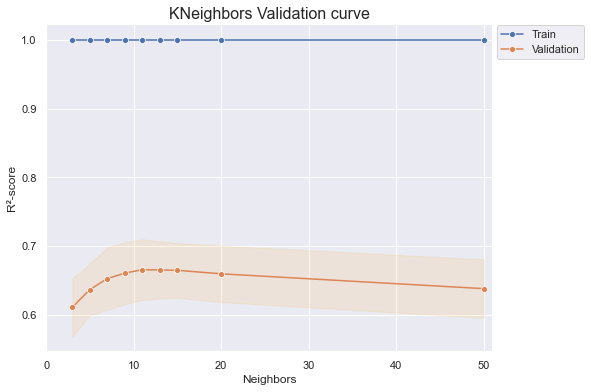

In [39]:
plot_validation_curve(reg, "KNeighbors", X_train, y_train, param_name="kneighborsregressor__n_neighbors", param_range=n_neighbors, param_name_short="Neighbors", cv=kfold)

<div style="background-color: #6D83C5;" >
    <h5 style="margin: auto; padding: 20px; color:#fff; ">6.1.2 KNeighbors Learning curve</h5>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Learning curve</b>, we are going to use the <b>best  parameters</b> to analyze the model
</div>

In [40]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, KNeighborsRegressor(n_neighbors=11, weights="distance", metric="euclidean"))

<div class="alert alert-block alert-info">
    Plotting <b>the learning curve</b> based on the best parameters
</div>

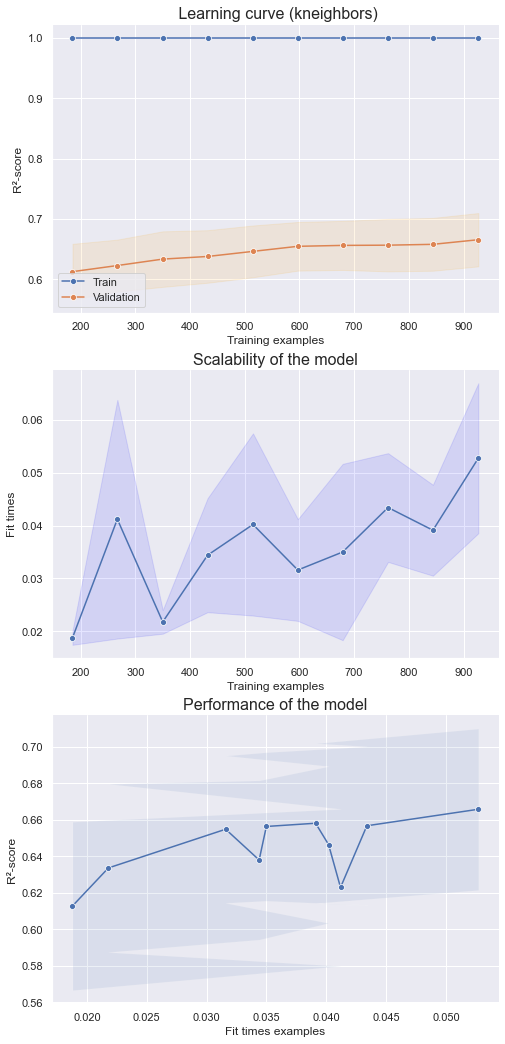

In [41]:
plot_learning_curve(reg, "kneighbors", X_train, y_train, cv=kfold)

<div style="background-color: #6D83C5;" >
    <h5 style="margin: auto; padding: 20px; color:#fff; ">6.1.3 KNeighbors predictions validations</h5>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>predictions validations</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> and <b>predicting</b> values</b>
</div>

In [42]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, KNeighborsRegressor(n_neighbors=11, weights="distance", metric="euclidean"))

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

<div class="alert alert-block alert-info">
    Plotting <b>the Cross-Validated Predictions</b> based on the best parameters for <b>training data</b>
</div>

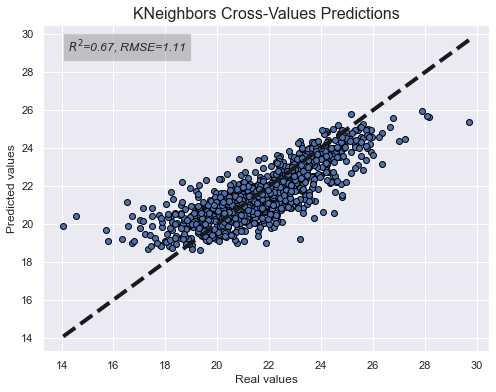

In [43]:
# Making the prediction using the testing data
plot_cross_val_predi(reg, "KNeighbors", X_train, y_train, cv=kfold)

<div style="background-color: #6D83C5;" >
    <h5 style="margin: auto; padding: 20px; color:#fff; ">6.1.4 Find the k Nearest Neighbors</h5>
</div>

<div class="alert alert-block alert-info">
    We are going to <b>process data</b> directly with <b>make_column_transformer</b> already defined
</div>

In [44]:
X_train_transformed = preprocessor.fit_transform(X_train)

In [45]:
X_train_transformed.shape

(1159, 28)

In [46]:
X_test_transformed = preprocessor.fit_transform(X_test)

In [47]:
X_test_transformed.shape

(497, 28)

<div class="alert alert-block alert-info">
    Now, we are going to select <b>one random sample</b> of X_test to find its Neighbors
</div>

In [48]:
seed(0)

# considering the X_test shape
indice = randint(0, 496, 1)
indice

array([172])

In [49]:
X_test_sample_transformed = X_test_transformed[indice]

<div class="alert alert-block alert-info">
    Initializing model
</div>

In [50]:
nbrs = NearestNeighbors(n_neighbors=11, algorithm="ball_tree")

<div class="alert alert-block alert-info">
    Fitting the NearestNeighbors
</div>

In [51]:
nbrs.fit(X_train_transformed)

NearestNeighbors(algorithm='ball_tree', n_neighbors=11)

<div class="alert alert-block alert-info">
    Finding the neighbors
</div>

In [52]:
distances, indices = nbrs.kneighbors(X_test_sample_transformed)

<div class="alert alert-block alert-info">
    Sample selected
</div>

In [53]:
X_test.iloc[indice]

,NumberofFloors,NumberofBuildings,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),Neighborhood,renamed_PropertyType,Electricity_ratio
1277,2,1,93,14.663725,0,14.663725,GREATER DUWAMISH,Warehouse,100.00414


<div class="alert alert-block alert-info">
    Sample selected neighbors
</div>

In [54]:
X_train.iloc[indices[0].tolist()]

,NumberofFloors,NumberofBuildings,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),Neighborhood,renamed_PropertyType,Electricity_ratio
1216,2,1,96,14.656257,0,14.656257,GREATER DUWAMISH,Warehouse,97.74729
1110,1,1,91,14.659606,0,14.659606,GREATER DUWAMISH,Warehouse,100.00428
1137,1,1,76,14.487589,0,14.487589,GREATER DUWAMISH,Warehouse,100.00400
1499,1,1,99,15.190751,0,15.190751,GREATER DUWAMISH,Warehouse,96.11384
1115,1,1,85,15.237434,0,15.237434,GREATER DUWAMISH,Warehouse,100.00426
742,1,1,68,14.637078,0,14.637078,GREATER DUWAMISH,Warehouse,100.00422
1091,1,1,68,14.671430,0,14.671430,GREATER DUWAMISH,Warehouse,100.00413
1217,2,1,66,14.416666,0,14.416666,GREATER DUWAMISH,Warehouse,100.00415
1117,1,1,66,14.631120,0,14.631120,GREATER DUWAMISH,Warehouse,100.00412
754,1,1,66,14.703471,0,14.703471,GREATER DUWAMISH,Warehouse,100.00416


In [55]:
CCCCCCCCCCCCCCCCCCC

NameError: name 'CCCCCCCCCCCCCCCCCCC' is not defined

<div class="alert alert-block alert-danger">
    <b>Flag position</b>
</div>

In [ ]:
X_test

In [ ]:
# tratando de graficar knn

In [ ]:
    # Get the predicted values
    predicted = cross_val_predict(estimator, X_train, y_train, cv=kfold)
    
    # Initializing figure
    fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.scatter(y_train, predicted, edgecolors=(0, 0, 0))
    ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "--k", lw=4)
    
    ax.text(min(y_train)+0.2, 0.98*max(y_train), r'$R^2$=%.2f, RMSE=%.2f' % (
            round(r2_score(y_train, predicted), 3),
            round(math.sqrt(mean_squared_error(y_train, predicted)), 3)), 
            style="italic", fontsize=12,
            bbox={"facecolor": "grey", "alpha": 0.4, "pad": 5})
            
    ax.set_title(name_model + " Cross-Values Predictions", fontdict={ "fontsize": 16, "fontweight": "normal" })
    ax.set_xlabel("Real values")
    ax.set_ylabel("Predicted values")
    plt.savefig("img/" + name_model + "-cross-val-predict.png")
    plt.show()

<div class="alert alert-block alert-danger">
    <b>Flag position</b>
</div>

<div style="background-color: #6D83C5;" >
    <h5 style="margin: auto; padding: 20px; color:#fff; ">6.1.4 KNeighbors Features Importance</h5>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, KNeighborsRegressor(n_neighbors=11, weights="distance", metric="euclidean"))

reg.fit(X_train, y_train)

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

In [ ]:
plot_features_importance(reg, "KNeighbors", X_train, y_train, scoring="neg_mean_squared_error")

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.2. Linear Regression optimization</h4>
</div>

<div class="alert alert-block alert-info">
    Initializing model
</div>

In [ ]:
linreg = LinearRegression()

<div class="alert alert-block alert-info">
    Data preprocessing based on the pipelines and the regressors setup
</div>

In [ ]:
reg = make_pipeline(preprocessor, linreg)

<div class="alert alert-block alert-info">
    Identifying the names of each parameter
</div>

In [ ]:
sorted(reg.get_params().keys())

<div class="alert alert-block alert-info">
    Parameters settings
</div>

In [ ]:
param_grid = {
    "linearregression__copy_X" : [True, False],
    "linearregression__fit_intercept" : [True, False]
}

<div class="alert alert-block alert-info">
    Executing the model
</div>

In [ ]:
# K-Folds cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

search = GridSearchCV(reg, param_grid, n_jobs=-1, cv=kfold, scoring=SCORINGS, refit="R2", return_train_score=True)

search.fit(X_train, y_train)

# Transforming the result to dataframe format
df_results = pd.DataFrame(search.cv_results_)

# Get the results
print("Metrics based on the best R2".translate(SUP))
print("- R2:".translate(SUP), round(search.best_score_, 3))
print("- MAE:", round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3))
print("- RMSE:", round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3))
print("- Duration:", round(df_results.iloc[search.best_index_]["mean_score_time"], 3))
print("- Parameters:", search.best_params_)

<div class="alert alert-block alert-info">
    Now we are going to analyze more in details the best parameters
</div>

In [ ]:
# K-Folds cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, LinearRegression(copy_X=True, fit_intercept=True))

<div style="background-color: #6D83C5;" >
    <h5 style="margin: auto; padding: 20px; color:#fff; ">6.2.1 Linear Validation curve</h5>
</div>

<div class="alert alert-block alert-info">
    Plotting <b>the validacion curve</b> based on the best parameters
</div>

train_scores, test_scores = validation_curve(reg, X_train, y_train, param_name="steps", param_range=np.logspace(-6, -1, 5), cv=kfold)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))

plot = sns.lineplot(x=n_neighbors, y=train_scores_mean, label="Train", marker="o")
plt.fill_between(n_neighbors, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")

plot = sns.lineplot(x=n_neighbors, y=test_scores_mean, label="Validation", marker="o")
plt.fill_between(n_neighbors, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")

plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.title("KNeighbors Validation curve", size=20)
plot.set(xlabel="Number of neighbors", ylabel="R2-score".translate(SUP), xlim=[0, 51])
plt.savefig("img/kneighbors-validation-curve.png")
sns.despine(fig)

<div style="background-color: #6D83C5;" >
    <h5 style="margin: auto; padding: 20px; color:#fff; ">6.2.1 Linear Learning curve</h5>
</div>

<div class="alert alert-block alert-info">
    Plotting <b>the learning curve</b> based on the best parameters
</div>

In [ ]:
plot_learning_curve(reg, "Linear", X_train, y_train, cv=kfold)

<div style="background-color: #6D83C5;" >
    <h5 style="margin: auto; padding: 20px; color:#fff; ">6.2.3 Linear predictions validations</h5>
</div>

<div class="alert alert-block alert-info">
    Plotting <b>the Cross-Validated Predictions</b> based on the best parameters
</div>

In [ ]:
predicted = cross_val_predict(reg, X_train, y_train, cv=kfold)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y_train, predicted, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "--k", lw=4)

ax.text(0.48*max(y_train), 1.2*max(y_train), r'$R^2$=%.2f, RMSE=%.2f' % (
            round(search.best_score_, 3),
            round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3)))
        
ax.set_title("KNN Cross-Validated Predictions", fontsize=20)
ax.set_xlabel("Real values")
ax.set_ylabel("Predicted values")
plt.show()

<div style="background-color: #6D83C5;" >
    <h5 style="margin: auto; padding: 20px; color:#fff; ">6.1.4 Linear Features Importance</h5>
</div>

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

In [ ]:
# K-Folds cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, LinearRegression(copy_X=True, fit_intercept=True))

In [ ]:
reg.fit(X_train, y_train)
results = permutation_importance(reg, X_train, y_train, scoring="neg_mean_squared_error")

In [ ]:
df_importance = pd.DataFrame({
    "Feature" : X_train.columns,
    "Importance" : results.importances_mean
})
df_importance = df_importance.sort_values("Importance")

In [ ]:
fig = plt.subplots(figsize=(10, 8))
plot = sns.barplot(data=df_importance, y=df_importance["Feature"], x=df_importance["Importance"])
plt.xlabel("Importance", size=12)
plt.ylabel("Features", size=12)
plt.title("KNeighbors Features Importance", size=20)
plt.tight_layout()
plt.savefig("img/knn-feature-importance.png")
plt.show()

<div class="alert alert-block alert-danger">
    <b>Flag position</b>
</div>

- Learning curves
- metrics R2, MSE, MAE, etc....
- gráfica comparación de predicción con regresión
    - arreglar metrica R2 y RMSE
- importancia de features 

In [ ]:
XXXXXXXXX

<div style="background-color: #6D83C5;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">XXXXXXXXXXXXXXXXXXXXXXXXXXXXX</h1>
</div>

- cursos a mirar <br>
https://openclassrooms.com/fr/courses/6401081-improve-the-performance-of-a-machine-learning-model/6559796-tune-your-hyperparameters <br>
https://openclassrooms.com/fr/courses/6389626-train-a-supervised-machine-learning-model/6389633-think-through-a-classification-task <br>
https://lms.fun-mooc.fr/courses/course-v1:inria+41026+session01/courseware/cb3cfcaf0cae4cf7801c4e8d5dab9087/96ae0a5c701c4463a60cb975f75baa07/ <br>
https://www.youtube.com/watch?v=w_bLGK4Pteo

- grafica de error de training vs error test <br>
https://scikit-learn.org/stable/auto_examples/model_selection/plot_train_error_vs_test_error.html

- plotting learning curves <br>
https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html <br>
https://scikit-learn.org/stable/modules/learning_curve.html <br>
https://www.dataquest.io/blog/learning-curves-machine-learning/ <br>
https://utkuufuk.com/2018/05/04/learning-curves/ <br>
https://vitalflux.com/validation-curves-explained-python-sklearn-example/

- Validation curve <br>
https://sdsawtelle.github.io/blog/output/week6-andrew-ng-machine-learning-with-python.html

- Visualizaciones <br>
https://scikit-learn.org/stable/visualizations.html <br>
https://medium.datadriveninvestor.com/visualizing-scikit-model-performance-fb26ff16f7c6


- lsitado de metricas <br>
https://scikit-learn.org/stable/modules/model_evaluation.html <br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score <br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- Receiver Operating Characteristic (ROC) with cross validation <br>
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

- Underfitting vs. Overfitting <br>
https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py

- Plotting Cross-Validated Predictions <br>
https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_predict.htmlPlotting

- Bias Variance Trade off
https://towardsdatascience.com/bias-variance-tradeoff-7ca56ba182a

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.3. Lasso optimization</h4>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.4. Random Forest optimization</h4>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.5. SVR optimization</h4>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.6. Gradient Boosting optimization</h4>
</div>

<div class="alert alert-block alert-info">
    Initializing model
</div>

In [ ]:
gbr = GradientBoostingRegressor()

<div class="alert alert-block alert-info">
    Data preprocessing based on the pipelines and the regressors setup
</div>

In [ ]:
reg = make_pipeline(preprocessor, gbr)

<div class="alert alert-block alert-info">
    Identifying the names of each parameter
</div>

In [ ]:
sorted(reg.get_params().keys())

<div class="alert alert-block alert-info">
    Parameters settings
</div>

In [ ]:
param_grid = {
    "gradientboostingregressor__learning_rate" : [0.01, 0.02, 0.03, 0.04],
    "gradientboostingregressor__max_depth" : [4, 6, 8, 10],
    "gradientboostingregressor__n_estimators" : [100, 500, 1000, 1500],
    "gradientboostingregressor__subsample" : [0.9, 0.5, 0.2, 0.1]
}

<div class="alert alert-block alert-info">
    Executing the model
</div>

In [ ]:
# K-Folds cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

search = GridSearchCV(reg, param_grid, n_jobs=-1, cv=kfold, scoring=SCORINGS, refit="R2", return_train_score=True)

search.fit(X_train, y_train)

# # Transforming the result to dataframe format
# df_results = pd.DataFrame(search.cv_results_)

# # Get the results
# print("Metrics based on the best R2".translate(SUP))
# print("- R2:".translate(SUP), round(search.best_score_, 3))
# print("- MAE:", round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3))
# print("- RMSE:", round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3))
# print("- Duration:", round(df_results.iloc[search.best_index_]["mean_score_time"], 3))
# print("- Parameters:", search.best_params_)